## Perceptron
### Datos + Gráfico

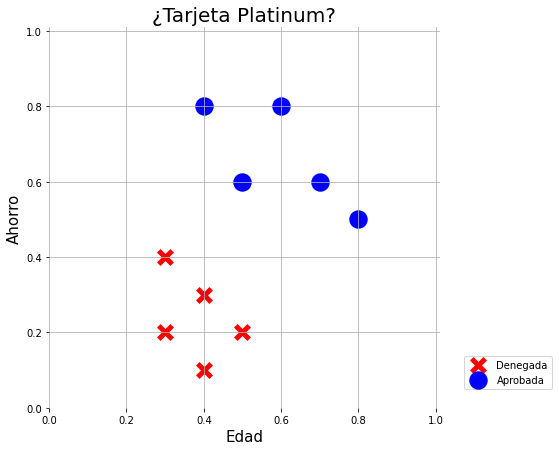

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de 10 personas -> [edad, ahorro]

personas = np.array([[0.3, 0.4], [0.4, 0.3],
                     [0.3, 0.2], [0.4, 0.1],
                     [0.5, 0.2], [0.4, 0.8],
                     [0.6, 0.8], [0.5, 0.6],
                     [0.7, 0.6], [0.8, 0.5]])

# 1 : aprobrada    0 : denegada

clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])


# Gráfica de dispersión (edad, ahorro)
plt.figure(figsize=(7, 7))
plt.title("¿Tarjeta Platinum?", fontsize=20)
plt.scatter(personas[clases == 0].T[0],
            personas[clases == 0].T[1],
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")
plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1],
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.grid()
plt.show()


### Función de Activación (Escalón)

In [3]:


# w1*x1 + w2*x2 + ⋯ + wn*xn

def activacion(pesos, x, b):
    z = pesos * x
    if z.sum() + b > 0:
        return 1
    else:
        return 0

pesos = np.random.uniform(-1, 1, size=2)
print(pesos)
b = np.random.uniform(-1, 1)

# Test - Not trainned yet
pesos, b, activacion(pesos, [0.5, 0.4], b)

[-0.71776627  0.98808723]


(array([-0.71776627,  0.98808723]), 0.8075095802375396, 1)

### Pseudocódigo del Perceptrón

0. Inicializar los pesos y el umbral
1. epocas máximas = 100
2. epoca = 0
3. tasa de aprendizaje = 0.01
4. Mientras (epoca < epocas máximas) hacer:
5.      Para cada instancia de entrenamiento hacer:
6.          Calcula salida del perceptrón para esa estancia
7.          Calcula el error
8.          Actualiza pesos y umbral usando la tasa de aprendizaje, la instancia y el error
9.      epoca += 1

## Entrenamiento del Perceptrón

In [5]:
pesos = np.random.uniform(-1, 1, size=2)
b = np.random.uniform(-1, 1)
epocas = 100
epoca = 0
tasa_de_aprendizaje = 0.01

while epoca in range(epocas):
    error_total = 0
    for i in range(len(personas)):
        prediccion = activacion(pesos, personas[i], b)
        error = clases[i] - prediccion
        error_total += error**2
        pesos[0] += tasa_de_aprendizaje * error * personas[i][0]
        pesos[1] += tasa_de_aprendizaje * error * personas[i][1]
        b += tasa_de_aprendizaje * error
    epoca += 1
    print(epoca , "-" ,error_total , " / ", end=" ")


activacion(pesos, [0.5, 0.5], b)

1 - 5  /  2 - 5  /  3 - 5  /  4 - 5  /  5 - 4  /  6 - 3  /  7 - 3  /  8 - 3  /  9 - 2  /  10 - 1  /  11 - 1  /  12 - 1  /  13 - 1  /  14 - 1  /  15 - 1  /  16 - 1  /  17 - 0  /  18 - 0  /  19 - 0  /  20 - 0  /  21 - 0  /  22 - 0  /  23 - 0  /  24 - 0  /  25 - 0  /  26 - 0  /  27 - 0  /  28 - 0  /  29 - 0  /  30 - 0  /  31 - 0  /  32 - 0  /  33 - 0  /  34 - 0  /  35 - 0  /  36 - 0  /  37 - 0  /  38 - 0  /  39 - 0  /  40 - 0  /  41 - 0  /  42 - 0  /  43 - 0  /  44 - 0  /  45 - 0  /  46 - 0  /  47 - 0  /  48 - 0  /  49 - 0  /  50 - 0  /  51 - 0  /  52 - 0  /  53 - 0  /  54 - 0  /  55 - 0  /  56 - 0  /  57 - 0  /  58 - 0  /  59 - 0  /  60 - 0  /  61 - 0  /  62 - 0  /  63 - 0  /  64 - 0  /  65 - 0  /  66 - 0  /  67 - 0  /  68 - 0  /  69 - 0  /  70 - 0  /  71 - 0  /  72 - 0  /  73 - 0  /  74 - 0  /  75 - 0  /  76 - 0  /  77 - 0  /  78 - 0  /  79 - 0  /  80 - 0  /  81 - 0  /  82 - 0  /  83 - 0  /  84 - 0  /  85 - 0  /  86 - 0  /  87 - 0  /  88 - 0  /  89 - 0  /  90 - 0  /  91 - 0  /  92 - 0  

1

## Zonas de aprobación
## Gráfica de dispersión [edad, ahorro]

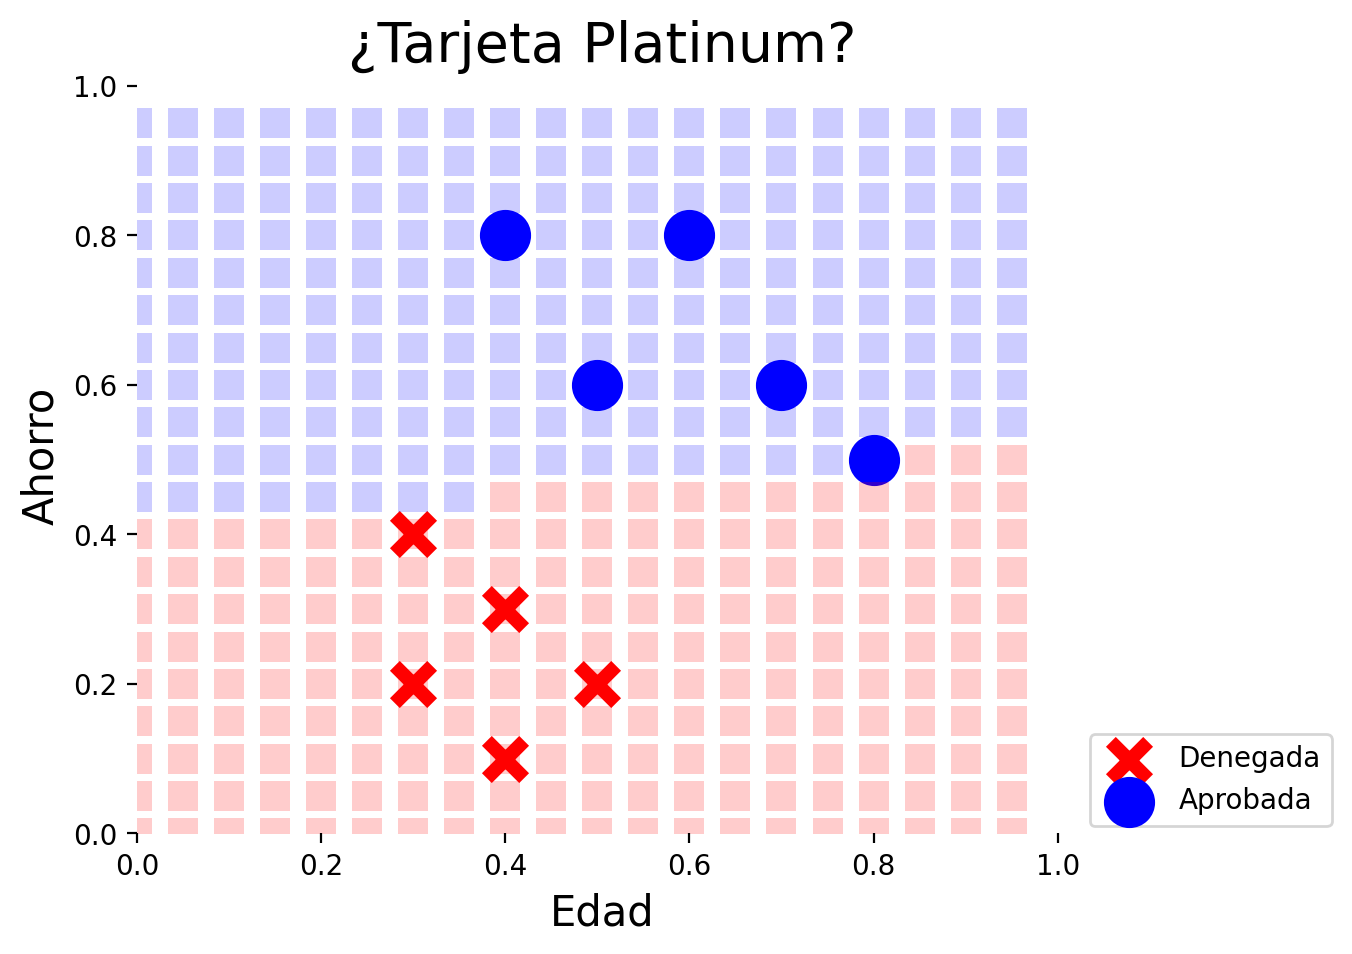

In [6]:
plt.figure(figsize=(6, 5), dpi=200)
plt.title("¿Tarjeta Platinum?", fontsize=20)

plt.scatter(personas[clases == 0].T[0],
            personas[clases == 0].T[1],
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1],
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")

for edad in np.arange(0, 1, 0.05):
    for ahorro in np.arange(0, 1, 0.05):
        color = activacion(pesos, [edad, ahorro], b)
        if color == 1:
            plt.scatter(edad, ahorro, marker="s", s=110,
                        color="blue", alpha=0.2, linewidths=0)
        else:
            plt.scatter(edad, ahorro, marker="s", s=110,
                        color="red", alpha=0.2, linewidths=0)

plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()
